# Reinforcement Learning Models of Social Group Preferences
## Bandit Experiments 1-7

In [23]:
# imports / display plots in cell output
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import pandas as pd
import seaborn as sns
import statsmodels

## Experiment 1: between subjects design
-participants randomly assigned to receive only 'gems' or 'bomb' type rewards

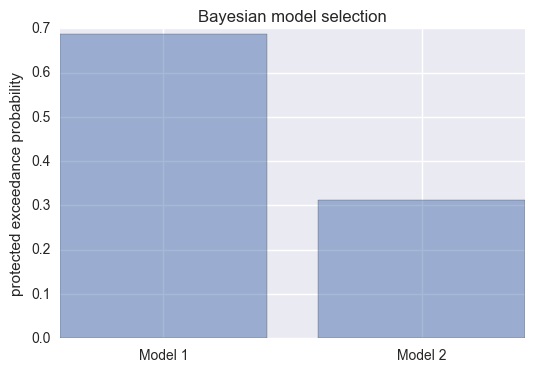

In [24]:
# Bayesian Model Selection (bor = .6240)
# Model 1: inverse temperature, stickiness, learning rate
# Model 2: inverse temperature, stickiness, positive learning rate, negative learning rate
models = ('Model 1', 'Model 2')
y_pos = np.arange(len(models))
pxp = [0.6880, 0.3120]
plt.bar(y_pos, pxp, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('protected exceedance probability')
plt.title('Bayesian model selection')
plt.show()

In [26]:
# import post-mfit b1 (bandit_either) summary data
#b1 = pd.read_csv('/Volumes/crisp/hinl/bandit/gems_vs_bomb/rez/b1_best_table.csv')
b1 = pd.read_csv('~/Desktop/bandit/gems_vs_bomb/rez/b1_d100_table.csv')
b1 = b1.drop('subID', axis=1)
data = pd.DataFrame(b1)
data.describe()

,payout,it,lr,sticky,rt_mean,rt_tot
count,208.000000,208.000000,208.000000,208.000000,208.000000,2.080000e+02
mean,105.187500,6.590912,0.579132,0.977115,404.951763,1.457826e+05
std,15.437843,3.392418,0.246023,1.143328,463.279102,1.667805e+05
min,70.000000,0.606764,0.000256,-3.620414,69.797222,2.512700e+04
25%,95.000000,4.151138,0.438162,0.267652,182.443750,6.567975e+04
50%,104.000000,6.099496,0.601137,1.082933,246.231944,8.864350e+04
75%,112.500000,8.295492,0.749011,1.782476,413.850000,1.489860e+05
max,150.000000,18.074366,0.997111,3.789444,3169.880556,1.141157e+06


## Experiment 2: within subjects design
-participants receive either 'gems' or 'bomb' type reward on each trial  
-reward type for each door determined by fixed probability [0.8 0.6 0.4 0.2]

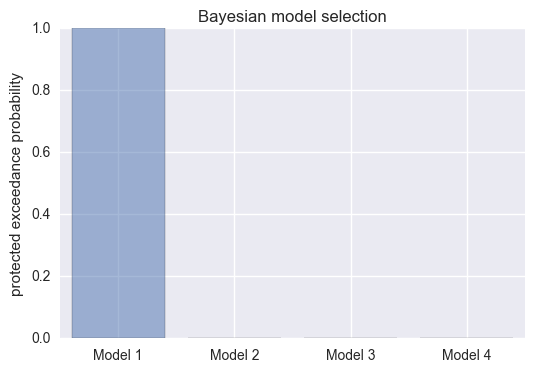

In [27]:
# Bayesian Model Selection (bor = .778e-21)
# Model 1: inverse temperature, stickiness, learning rate
# Model 2: inverse temperature, stickiness, gems learning rate, bomb learning rate
# Model 3: inverse temperature, stickiness, positive learning rate, negative learning rate
# Model 4: inverse temperature, stickiness, learning rate, gems preference
models = ('Model 1', 'Model 2', 'Model 3', 'Model 4')
y_pos = np.arange(len(models))
pxp = [1, 0, 0, 0]
plt.bar(y_pos, pxp, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('protected exceedance probability')
plt.title('Bayesian model selection')
plt.show()

In [33]:
# import post-mfit b2 (bandit_either) summary data
#b2 = pd.read_csv('/Volumes/crisp/hinl/bandit/gems_vs_bomb/rez/b2_best_table.csv')
b2 = pd.read_csv('~/Desktop/bandit/gems_vs_bomb/rez/b2_best_table.csv')
b2 = b2.drop('subID', axis=1)
data = pd.DataFrame(b2)
data.describe()

,gems,bomb,pGems,chose80,chose60,chose40,chose20,it,lr,sticky,rt_mean,rt_tot
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,50.672840,48.574074,0.513471,0.272171,0.254132,0.242575,0.231121,6.495081,0.493145,1.152625,507.365724,182651.660494
std,8.826013,9.003661,0.046526,0.094960,0.072796,0.071436,0.068968,4.160503,0.288417,1.042405,325.994537,117358.033165
min,29.000000,22.000000,0.396111,0.044444,0.036111,0.036111,0.025000,1.038457,0.000880,-2.115228,73.750000,26550.000000
25%,44.000000,43.000000,0.485417,0.211806,0.214583,0.203472,0.191667,4.001160,0.312575,0.515296,318.508333,114663.000000
50%,50.500000,48.000000,0.510556,0.265278,0.250000,0.247222,0.231944,5.609003,0.547529,1.355445,454.241667,163527.000000
75%,57.000000,54.750000,0.537222,0.320833,0.296528,0.277778,0.269444,7.974248,0.701536,1.858879,610.833333,219900.000000
max,71.000000,68.000000,0.706667,0.761111,0.541667,0.463889,0.413889,32.159364,0.993634,2.989728,2608.050000,938898.000000


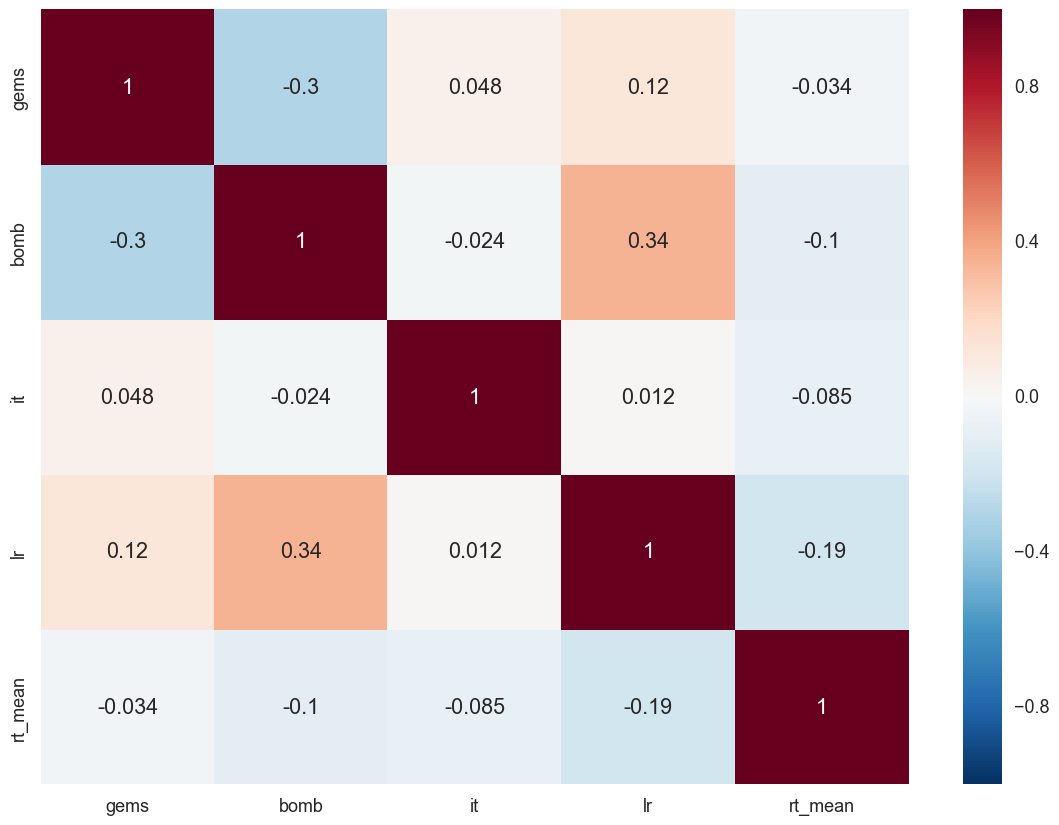

In [35]:
# make heatmap of all b2 correlations
data = b2[['gems','bomb','it','lr','rt_mean']]
r = data.corr()
with sns.plotting_context("talk", font_scale=1):
    ax = sns.heatmap(r, annot=True)
    ax.figure.set_size_inches((14, 10))

## Experiment 3: narrative w/ low reward probability
-participants receive either 'gems' or 'bomb' type reward on each trial  
-reward type for each door determined by fixed probability [0.8 0.6 0.4 0.2]  
-intergroup bias computed by subtracting outgroup ID from ingroup ID

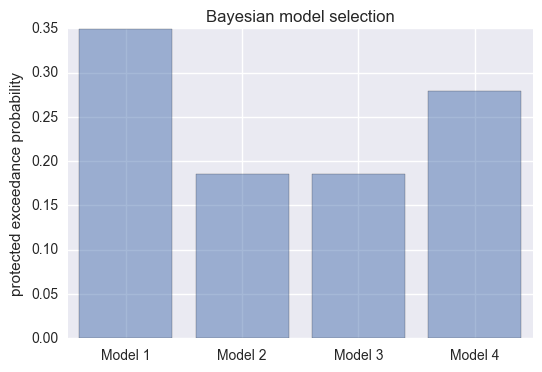

In [36]:
# Bayesian Model Selection (bor = .7427)
# Model 1: inverse temperature, stickiness, learning rate
# Model 2: inverse temperature, stickiness, gems learning rate, bomb learning rate
# Model 3: inverse temperature, stickiness, positive learning rate, negative learning rate
# Model 4: inverse temperature, stickiness, learning rate, gems preference
models = ('Model 1', 'Model 2', 'Model 3', 'Model 4')
y_pos = np.arange(len(models))
pxp = [0.3497, 0.1857, 0.1857, 0.2789]
plt.bar(y_pos, pxp, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('protected exceedance probability')
plt.title('Bayesian model selection')
plt.show()

In [37]:
# import post-mfit b3 (bandit_either) summary data
#b3 = pd.read_csv('/Volumes/crisp/hinl/bandit/gems_vs_bomb/rez/b3_best_table.csv')
b3 = pd.read_csv('~/Desktop/bandit/gems_vs_bomb/rez/b3_best_table.csv')
b3 = b3.drop('subID', axis=1)
data = pd.DataFrame(b3)
data.describe()

,gems,bomb,igbias,pGems,chose80,chose60,chose40,chose20,it,lr,sticky,rt_mean,rt_tot
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,1.600000e+02
mean,51.756250,48.243750,2.363542,0.522413,0.296215,0.242240,0.238941,0.222604,6.175724,0.503332,1.203774,566.760382,2.040337e+05
std,9.367915,9.678315,2.672352,0.056627,0.119410,0.074170,0.065959,0.077237,3.529393,0.277415,1.128181,426.390411,1.535005e+05
min,31.000000,18.000000,-4.500000,0.413333,0.130556,0.000000,0.052778,0.041667,0.869508,0.001756,-2.812999,96.430556,3.471500e+04
25%,45.000000,43.000000,0.000000,0.488611,0.229861,0.202778,0.200000,0.180556,3.588253,0.315617,0.654631,328.757639,1.183528e+05
50%,51.000000,48.000000,2.000000,0.515556,0.272222,0.244444,0.238889,0.226389,5.504985,0.547674,1.273765,449.455556,1.618040e+05
75%,58.000000,53.000000,5.000000,0.541250,0.319444,0.283333,0.280556,0.269444,7.922158,0.699513,1.939440,628.483333,2.262540e+05
max,77.000000,85.000000,6.000000,0.716667,0.830556,0.463889,0.419444,0.458333,18.157489,0.996391,3.422421,3822.966667,1.376268e+06


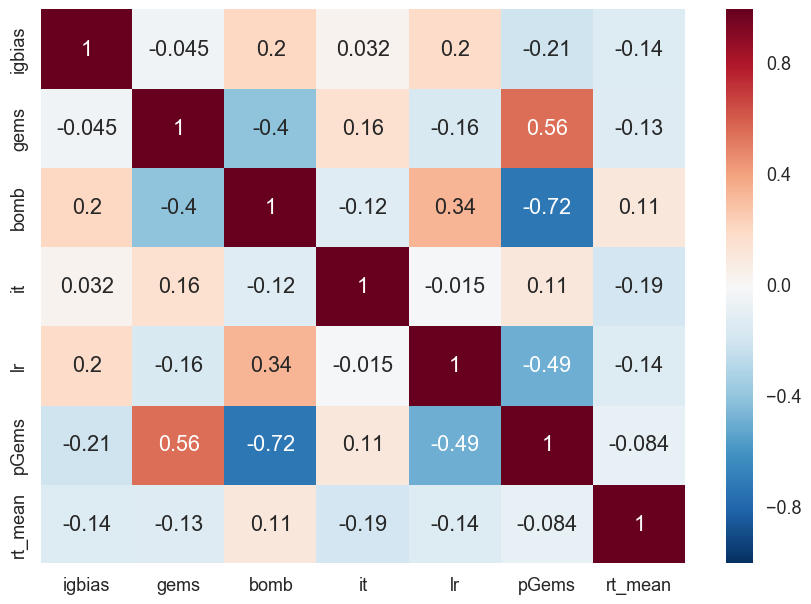

In [38]:
# make heatmap of all b3 correlations
data = b3[['igbias','gems','bomb','it','lr','pGems','rt_mean']]
r = data.corr()
with sns.plotting_context("talk", font_scale=1):
    ax = sns.heatmap(r, annot=True)
#    ax.figure.set_size_inches((14, 10))

## Experiment 4: narrative w/ multiple reward outcomes
-participants can receive either 'gems' **and/or** 'bomb' type reward on each trial  
-reward type for each door determined by independent drifting probabilities for gems and bomb  
-intergroup bias computed by subtracting outgroup ID from ingroup ID

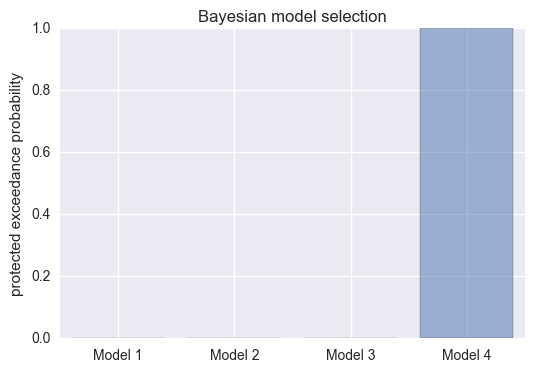

In [39]:
# Bayesian Model Selection (bor = 9.7058e-11)
# Model 1: inverse temperature, stickiness, learning rate
# Model 2: inverse temperature, stickiness, gems learning rate, bomb learning rate
# Model 3: inverse temperature, stickiness, positive learning rate, negative learning rate
# Model 4: inverse temperature, stickiness, learning rate, gems preference
models = ('Model 1', 'Model 2', 'Model 3', 'Model 4')
y_pos = np.arange(len(models))
pxp = [2.4264e-11, 2.4264e-11, 2.4264e-11, 1.0000]
plt.bar(y_pos, pxp, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('protected exceedance probability')
plt.title('Bayesian model selection')
plt.show()

In [44]:
# import post-mfit b4 (bandit_double) summary data
b4 = pd.read_csv('~/Desktop/bandit/gems_vs_bomb/rez/b4_best_table.csv')
b4 = b4.drop('subID', axis=1)
data = pd.DataFrame(b4)
data.describe()

,gems,bomb,igbias,wGems,it,lr,sticky,rt_mean,rt_tot
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,98.213836,94.993711,2.128931,0.673819,7.606354,0.631356,1.155607,437.429874,157474.754717
std,10.134141,11.484440,2.436386,0.193425,4.376166,0.223408,0.909335,339.284852,122142.546879
min,69.000000,67.000000,-4.833333,0.042825,0.688342,0.009612,-1.750565,76.075000,27387.000000
25%,92.000000,88.000000,0.000000,0.534406,4.528313,0.523059,0.532596,242.990278,87476.500000
50%,97.000000,96.000000,1.833333,0.628018,6.799249,0.642770,1.298711,352.005556,126722.000000
75%,105.500000,103.000000,3.916667,0.802756,9.953950,0.775285,1.702816,506.975000,182511.000000
max,121.000000,121.000000,6.000000,0.998410,30.720417,0.994118,3.320907,2468.427778,888634.000000


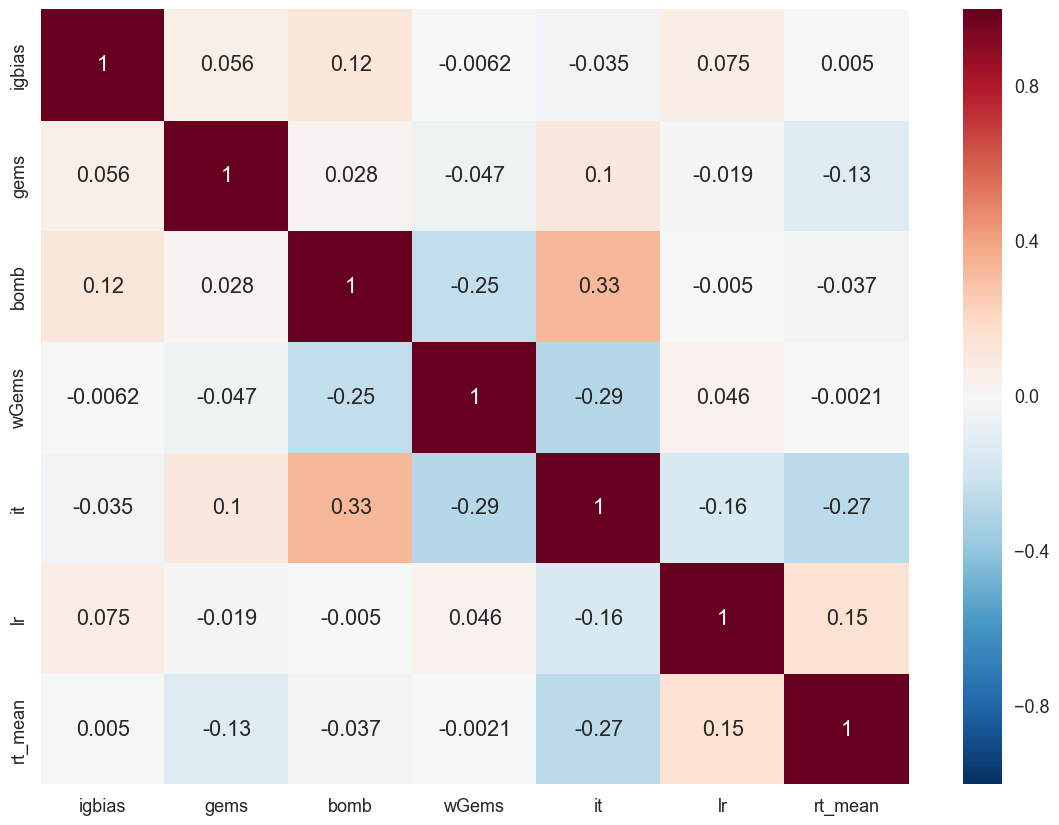

In [41]:
# make heatmap of all b4 correlations
data = b4[['igbias','gems','bomb','wGems','it','lr','rt_mean']]
r = data.corr()
with sns.plotting_context("talk", font_scale=1):
    ax = sns.heatmap(r, annot=True)
    ax.figure.set_size_inches((14, 10))

## Experiment 5: narrative w/ high reward probability  
-participants receive either 'gems' or 'bomb' type reward on each trial  
-reward type for each door determined by fixed probability [0.8 0.6 0.4 0.2]  
-intergroup bias computed by subtracting outgroup ID from ingroup ID  
-probability of reward twice as high as in Experiment 3

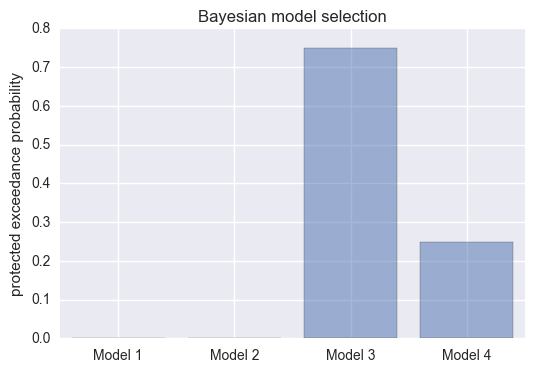

In [42]:
# Bayesian Model Selection (bor = .0052)
# Model 1: inverse temperature, stickiness, learning rate
# Model 2: inverse temperature, stickiness, gems learning rate, bomb learning rate
# Model 3: inverse temperature, stickiness, positive learning rate, negative learning rate
# Model 4: inverse temperature, stickiness, learning rate, gems preference
models = ('Model 1', 'Model 2', 'Model 3', 'Model 4')
y_pos = np.arange(len(models))
pxp = [0.0013, 0.0013, 0.7480, 0.2494]
plt.bar(y_pos, pxp, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('protected exceedance probability')
plt.title('Bayesian model selection')
plt.show()

In [43]:
# import post-mfit b5 (bandit_either) summary data
#b5 = pd.read_csv('/Volumes/crisp/hinl/bandit/gems_vs_bomb/rez/b5_best_table.csv')
b5 = pd.read_csv('~/Desktop/bandit/gems_vs_bomb/rez/b5_best_table.csv')
data = pd.DataFrame(b5)
data.describe()

,subID,gems,bomb,igbias,pGems,chose80,chose60,chose40,chose20,it,lr_pos,lr_neg,sticky,rt_mean,rt_tot
count,1.440000e+02,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,1.440000e+02
mean,4.269511e+07,112.861111,101.777778,2.326389,0.529753,0.306674,0.250154,0.228434,0.214738,6.844754,0.493670,0.613975,1.176835,595.322550,2.143161e+05
std,2.580464e+07,18.291582,22.974734,2.390482,0.068553,0.141462,0.088360,0.092720,0.105534,3.481787,0.305078,0.278885,1.092130,712.731425,2.565833e+05
min,2.711490e+05,40.000000,24.000000,-3.166667,0.222778,0.030556,0.000000,0.000000,0.000000,1.319192,0.001526,0.000359,-2.012706,28.808333,1.037100e+04
25%,2.287964e+07,101.000000,85.000000,0.000000,0.488750,0.216667,0.188889,0.165972,0.152778,4.031641,0.272672,0.515839,0.579155,302.267361,1.088162e+05
50%,4.216666e+07,113.000000,102.000000,2.250000,0.515556,0.291667,0.247222,0.225000,0.213889,6.256013,0.483558,0.683987,1.280462,428.487500,1.542555e+05
75%,6.475296e+07,122.250000,117.250000,4.666667,0.566944,0.372917,0.300000,0.278472,0.278472,9.215856,0.761853,0.809835,1.970160,599.926389,2.159735e+05
max,8.889695e+07,162.000000,153.000000,6.000000,0.800000,1.000000,0.588889,0.472222,0.955556,18.921180,0.992200,0.994484,3.653603,6592.616667,2.373342e+06


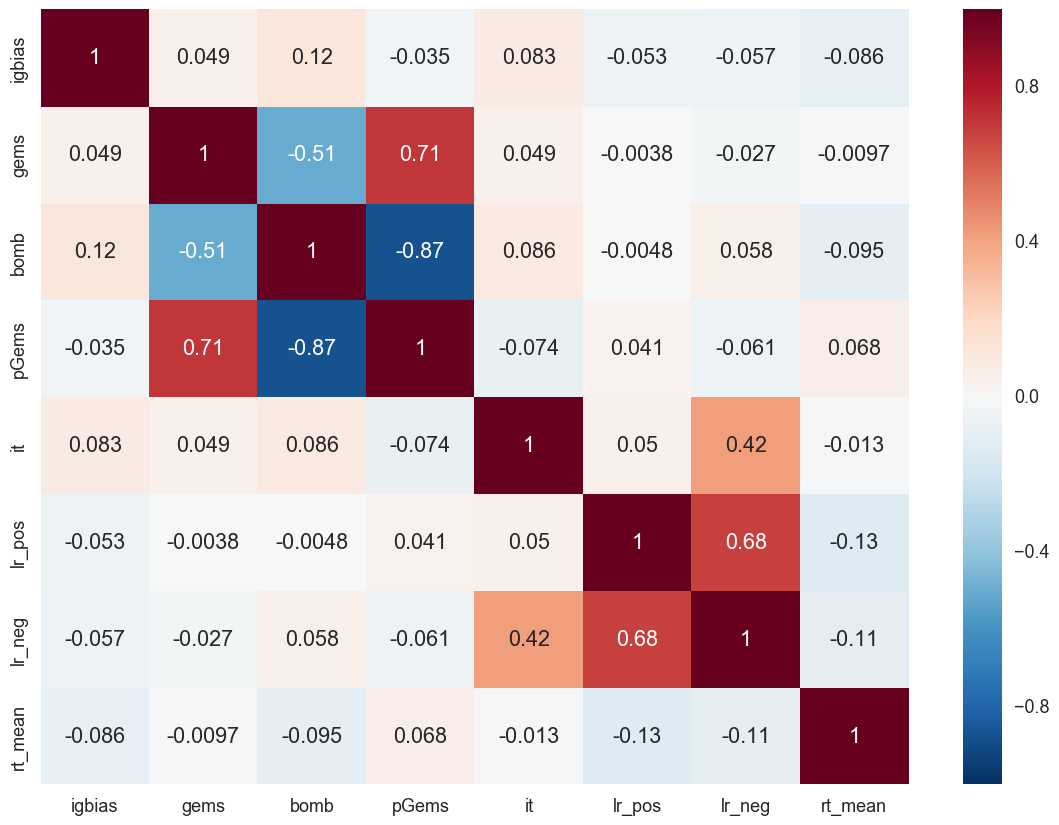

In [45]:
# make heatmap of all b5 correlations
data = b5[['igbias','gems','bomb','pGems','it','lr_pos','lr_neg','rt_mean']]
r = data.corr()
with sns.plotting_context("talk", font_scale=1):
    ax = sns.heatmap(r, annot=True)
    ax.figure.set_size_inches((14, 10))

## Experiment 6: political party w/ low reward probability  
-participants receive either 'bill' or 'burning bill' type reward on each trial  
-reward type for each door determined by fixed probability [0.8 0.6 0.4 0.2]  
-intergroup bias computed by subtracting outgroup ID from ingroup ID  
-probability of reward same as in Experiment 3 (mean = 0.25)

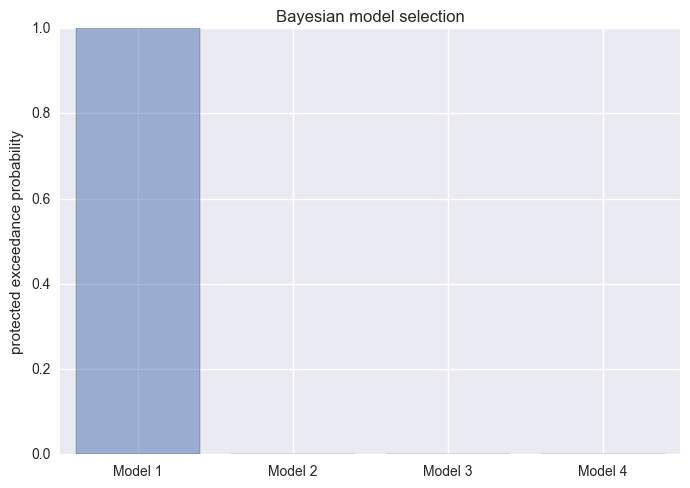

In [22]:
# Bayesian Model Selection (bor = 4.61e-37)
# Model 1: inverse temperature, stickiness, learning rate
# Model 2: inverse temperature, stickiness, gems learning rate, bomb learning rate
# Model 3: inverse temperature, stickiness, positive learning rate, negative learning rate
# Model 4: inverse temperature, stickiness, learning rate, gems preference
models = ('Model 1', 'Model 2', 'Model 3', 'Model 4')
y_pos = np.arange(len(models))
pxp = [1, 0, 0, 0]
plt.bar(y_pos, pxp, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('protected exceedance probability')
plt.title('Bayesian model selection')
plt.show()

In [46]:
# import post-mfit b6 (bandit_either) summary data
#b6 = pd.read_csv('/Volumes/crisp/hinl/bandit/gems_vs_bomb/rez/b6_best_table.csv')
b6 = pd.read_csv('~/Desktop/bandit/gems_vs_bomb/rez/b6_best_table.csv')
data = pd.DataFrame(b6)
data.describe()

,gems,bomb,igbias,pBurn,chose80,chose60,chose40,chose20,it,lr,sticky,rt_mean,rt_tot
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02
mean,49.396040,49.351485,2.936469,0.499070,0.253328,0.248089,0.248487,0.250096,6.462083,0.513985,1.120276,587.061180,2.113420e+05
std,7.893671,9.683048,1.776546,0.045387,0.091086,0.081759,0.074275,0.082109,4.390131,0.294296,1.030120,477.631755,1.719474e+05
min,26.000000,23.000000,-3.500000,0.281111,0.030556,0.055556,0.036111,0.002778,0.837228,0.000768,-1.667301,93.105556,3.351800e+04
25%,44.250000,43.000000,2.000000,0.479583,0.211111,0.195139,0.209028,0.202778,3.631478,0.370698,0.433417,297.538889,1.071140e+05
50%,50.000000,50.000000,3.000000,0.500833,0.244444,0.241667,0.250000,0.247222,5.388272,0.578529,1.168442,453.891667,1.634010e+05
75%,54.750000,54.750000,4.333333,0.521667,0.280556,0.291667,0.280556,0.296528,8.326158,0.728241,1.904158,687.011111,2.473240e+05
max,72.000000,79.000000,6.000000,0.657778,0.780556,0.666667,0.538889,0.688889,32.585341,0.996888,3.680326,3303.875000,1.189395e+06


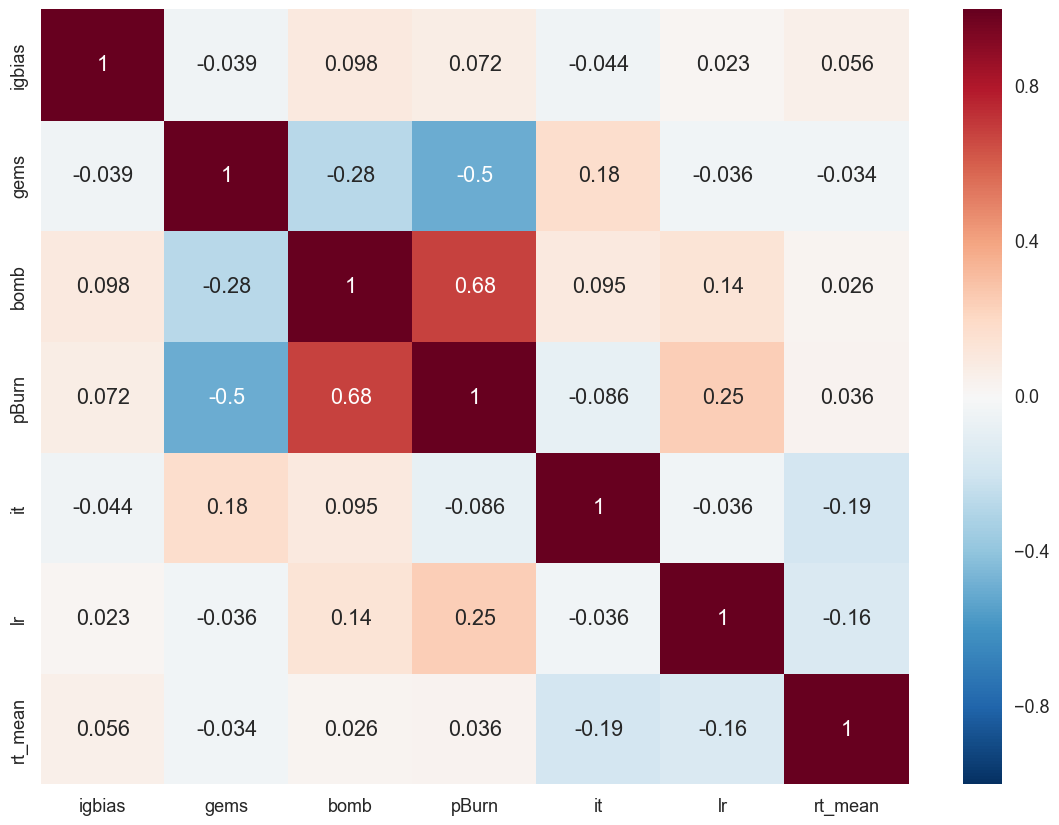

In [52]:
# make heatmap of all b6 correlations
data = b6[['igbias','gems','bomb','pBurn','it','lr','rt_mean']]
r = data.corr()
with sns.plotting_context("talk", font_scale=1):
    ax = sns.heatmap(r, annot=True)
    ax.figure.set_size_inches((14, 10))

## Experiment 7: political parties w/ high reward probability  
-participants receive either 'bill' or 'burning bill' type reward on each trial  
-reward type for each door determined by fixed probability [0.8 0.6 0.4 0.2]  
-intergroup bias computed by subtracting outgroup ID from ingroup ID  
-probability of reward same as in Experiment 5 (mean = 0.5)

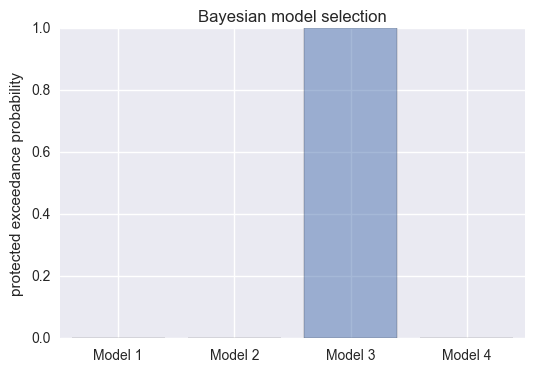

In [48]:
# Bayesian Model Selection (bor = 1.410e-7)
# Model 1: inverse temperature, stickiness, learning rate
# Model 2: inverse temperature, stickiness, gems learning rate, bomb learning rate
# Model 3: inverse temperature, stickiness, positive learning rate, negative learning rate
# Model 4: inverse temperature, stickiness, learning rate, gems preference
models = ('Model 1', 'Model 2', 'Model 3', 'Model 4')
y_pos = np.arange(len(models))
pxp = [0.000001, 0.000001, 0.99999, 0.000001]
plt.bar(y_pos, pxp, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('protected exceedance probability')
plt.title('Bayesian model selection')
plt.show()

In [49]:
# import post-mfit b5 (bandit_either) summary data
b7 = pd.read_csv('~/Desktop/bandit/gems_vs_bomb/rez/b7_best_table.csv')
data = pd.DataFrame(b7)
data.describe()

,gems,bomb,igbias,pBurn,chose80,chose60,chose40,chose20,it,lr_pos,lr_neg,sticky,rt_mean,rt_tot
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,1.960000e+02
mean,108.602041,104.576531,3.024660,0.490700,0.271542,0.247307,0.237259,0.243892,6.487587,0.488321,0.637416,1.041998,588.818821,2.119748e+05
std,17.400407,20.504640,1.743801,0.071047,0.133680,0.091423,0.104542,0.124371,3.032442,0.313081,0.309249,1.213671,442.964312,1.594672e+05
min,42.000000,34.000000,-1.000000,0.231111,0.025000,0.000000,0.008333,0.000000,0.720456,0.000552,0.000205,-4.705353,0.000000,0.000000e+00
25%,97.000000,93.750000,1.666667,0.461528,0.190972,0.190972,0.175000,0.174306,4.080305,0.257417,0.542534,0.439647,347.098611,1.249555e+05
50%,107.500000,105.000000,3.000000,0.500000,0.250000,0.237500,0.236111,0.236111,6.346019,0.471918,0.732648,1.162817,503.444444,1.812400e+05
75%,122.000000,118.000000,4.333333,0.525833,0.322222,0.292361,0.295139,0.297917,8.317775,0.774714,0.840646,1.861268,674.522222,2.428280e+05
max,152.000000,153.000000,6.000000,0.772778,0.925000,0.602778,0.680556,0.933333,15.822866,0.989395,0.996255,4.018797,3586.850000,1.291266e+06


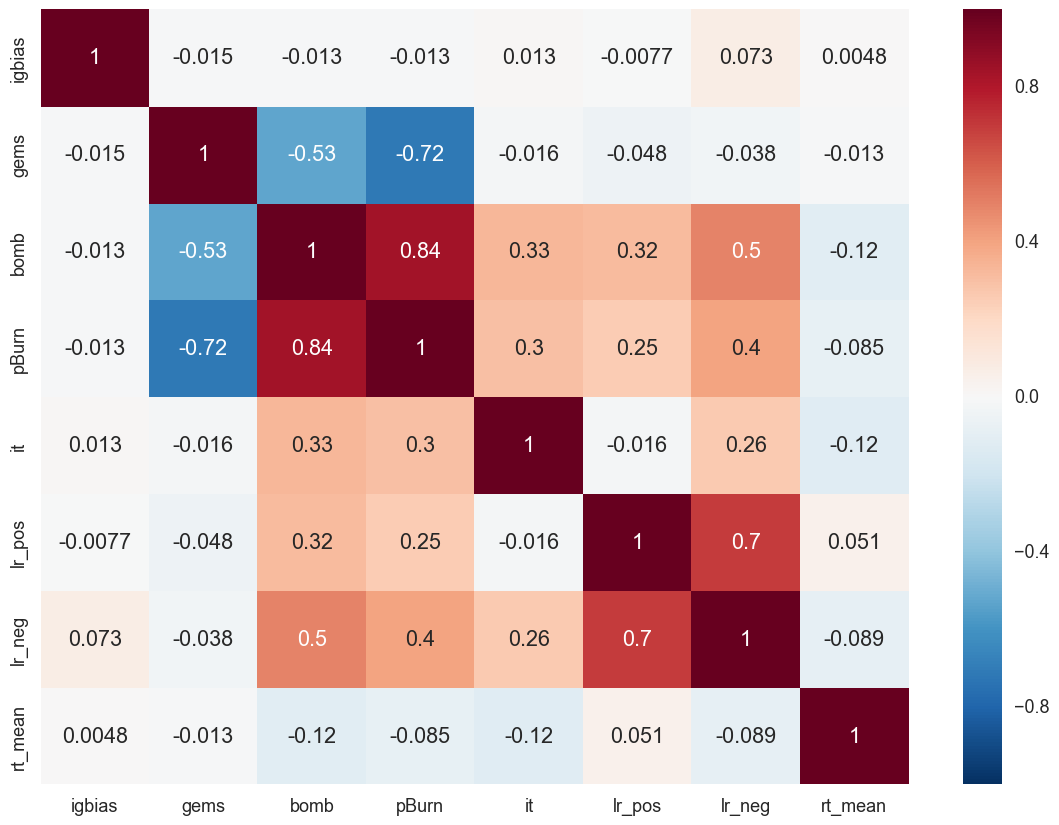

In [51]:
# make heatmap of all b7 correlations
data = b7[['igbias','gems','bomb','pBurn','it','lr_pos','lr_neg','rt_mean']]
r = data.corr()
with sns.plotting_context("talk", font_scale=1):
    ax = sns.heatmap(r, annot=True)
    ax.figure.set_size_inches((14, 10))